Import libraries
---------------

In [75]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd
import numpy as np
import csv
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
#%matplotlib inline

Draw map
--------

http://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/export?bbox=119.7,21.7,122.3,25.5&bboxSR=3821&imageSR=3821&size=1000,1461&dpi=96&format=png32&f=image


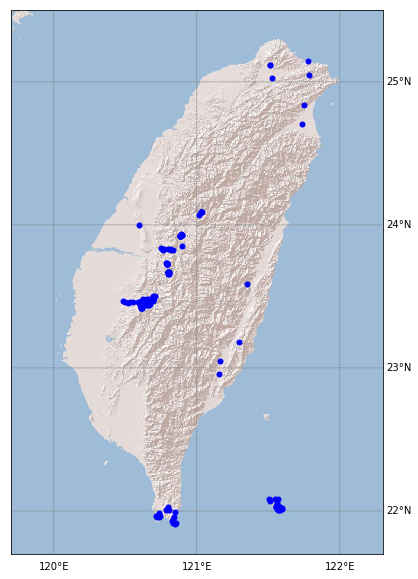

In [95]:
# create figure
plt.figure(figsize=(8,10))

# create map
m = Basemap(resolution='i', # c, l, i, h, f or None
            projection='tmerc',
            epsg=3821,
            area_thresh=0.,
            #get bounding box coords here: http://boundingbox.klokantech.com
            # select 'dublincore'
            llcrnrlon=119.7, llcrnrlat= 21.7, urcrnrlon=122.3, urcrnrlat=25.5)
#m.drawmapboundary(fill_color='#cce0ff') # sea
#m.fillcontinents(color='#a6a6a6',lake_color='#cce0ff') # land & lakes
#m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,1.),labels=[False,True,True,False],color='grey')
m.drawmeridians(np.arange(-180.,181.,1.),labels=[True,False,False,True],color='grey')
m.arcgisimage(service='World_Shaded_Relief', xpixels = 1000, verbose= True)
# http://server.arcgisonline.com/arcgis/rest/services
# options see: http://qingkaikong.blogspot.com/2016/06/nice-python-basemap-background.html

# read coordinates into pandas DataFrame and plot on map
data = pd.read_csv("loc_coords.csv", header=0)
col_y = list(data.y)
col_x = list(data.x)
m.plot(col_x, col_y, marker='.',color='blue', markersize=10, linestyle='None')

# plt.show()

plt.savefig('outfilename6.png', dpi=300, bbox_inches=None)
# plt.savefig('outfilename.pdf', format=pdf, bbox_inches=None)